# Portfolio Optimization Problem

Consider a scenario where an investor has £20,000 to invest in a combination of the following:
- Stock ABC sells today at £20 per share.
- A European call option to buy 100 shares of stock ABC at £15 per share exactly six months from today sells for £1,000.
- The investor can also raise additional funds which can be immediately invested, if desired, by selling call options with the above characteristics.
- In addition, a 6-month riskless zero-coupon bond with a £100 face value sells for £90.
- The investor has decided to limit the number of call options that they buy or sell to at most 50.

The investor considers three scenarios for the price of stock ABC six months from today: 
- The price remains the same at £20.
- The price goes up to £40.
- The price drops to £12.

The investor’s best estimate is that each of these scenarios is equally likely. Suppose that the investor wants a profit of at least £2,000 in any of the three scenarios for the price of ABC six months from today.

##### Objective
The goal is to **maximize** the expected profit from investing in a combination of stocks, bonds, and options, subject to certain constraints.

### Parameters
- Stock price per share (ABC): £20
- Call option price for 100 shares: £1,000
- Strike price of call option: £15
- Zero-coupon bond face value: £100
- Zero-coupon bond price: £90
- Initial investment: £20,000
- Maximum number of call options to buy/sell: 50
- Minimum desired profit: £2,000
- Stock price scenarios: (equally likely)
  - Remains the same at £20
  - Increase to £40
  - Decrease to £12 


### Decision Variables
- x be the number of shares of stock ABC to buy
- y be the number of call options to sell (with the given strike price and expiration date)
- z be the number of call options to buy (with the given strike price and expiration date)
- a be the auxiliary variable for riskless zero-coupon bond
   
### Constraints
- Budget: the total investment cannot exceed £20,000.
- Scenario1: the expected profit in scenario 1 (stock price stays the same) must be at least £2,000.
- Scenario2: the expected profit in scenario 2 (stock price goes up to £40) must be at least £2,000.
- Scenario3: the expected profit in scenario 3 (stock price drops to £12) must be at least £2,000.
- Option1: limit the number of call options that they buy or sell to at most 50 
- Option2: non-negative amounts for buying and selling options
- Option3: all decision variables are integers

#### Investment / Budget Constraint
The budget constraint ensures that the total investment does not exceed £20,000. It is formulated as follows:

$$20x + 1000y - 1000z + 90a \leq 20000$$


This constraint represents the fact that buying stock ABC costs £20 per share, selling a call option generates £1000 in revenue, buying a call option costs £1000, and investing in the riskless bond costs £90 per £100 face value.


#### Profit Constraints
Ensure that the expected profit in each scenario meets the required threshold of a profit of at least £2,000. 
They are formulated as follows:

**Scenario 1:**
$$x(20 - 20) + \text{max}(0, 20 - 15) \times 100y - \text{max}(0, 20 - 15) \times 100z + (100 - 90)a \geq 2000$$

Simplified: $$500y−500z+10a\geq 2000$$

**Scenario 2:**
$$x(40 - 20) + \text{max}(0, 40 - 15) \times 100y - \text{max}(0, 40 - 15) \times 100z + (100 - 90)a \geq 2000$$

Simplified: $$520x+2500y−2500z+10a\geq 2000$$

**Scenario 3:**
$$x(12 - 20) + \text{max}(0, 12 - 15) \times 100y - \text{max}(0, 12 - 15) \times 100z + (100 - 90)a \geq 2000$$

Simplified: $$−8x+10a\geq 2000$$

   
These constraints represent the expected profit in each scenario as a linear combination of the decision variables, and require that the expected profit in each scenario is at least £2,000.

#### Option Constraints
- Limit the number of call options bought or sold to at most 50:

$$
y \leq 50
$$
$$
z \leq 50
$$

- Ensure non-negative amounts for buying and selling options:

$$
x, y, z, a \geq 0
$$

- Ensure that all decision variables are integers:

$$
x, y, z, a \in \mathbb{Z}
$$

### Objective Function
Maximize the profit across all scenarios, given that each scenario is equally likely (probability of 1/3):

   $$
   \text{Expected Profit} = \frac{1}{3} (\text{Profit in Scenario 1} + \text{Profit in Scenario 2} + \text{Profit in Scenario 3})
   $$
   
Putting it all together, we will have the following linear program. The initial equation for Expected Profit is given by:

$$
\text{Expected Profit} = \frac{1}{3}\left[(500y - 500z + 10a) + (20x + 2500y - 2500z + 10a) + (-8x + 10a)\right]
$$

Simplifying this, we get:

$$
\text{Expected Profit} = 4x + 1000y - 1000z + 10a
$$

## Optimization Solving

In [1]:
#Import library
import pandas as pd
import pulp
import matplotlib.pyplot as plt

In [2]:
# Define the problem
problem = pulp.LpProblem("Portfolio_Optimization", pulp.LpMaximize)

# Define decision variables
x = pulp.LpVariable('x', lowBound=0, cat='Integer')  # Number of shares of stock ABC to buy
y = pulp.LpVariable('y', lowBound=0, upBound=50, cat='Integer')  # Number of call options to buy
z = pulp.LpVariable('z', lowBound=0, upBound=50, cat='Integer')  # Number of call options to sell
a = pulp.LpVariable('a', lowBound=0, cat='Integer')  # Auxiliary variable of  zero-coupon bonds to buy

# Parameters
initial_investment = 20000
stock_price_initial = 20
strike_price = 15
call_option_price = 1000
bond_price = 90
bond_face_value = 100
min_profit = 2000

# Investment constraint
problem += (20 * x) + (call_option_price * y) - (call_option_price * z) + (90 * a) <= initial_investment, "Investment"

# Profit constraints
# Scenario 1: Stock price remains the same at £20
profit_scenario_1 = (0 * x) + ((20 - strike_price) * 100 * y - (20 - strike_price) * 100 * z) + (bond_face_value - bond_price) * a
problem += profit_scenario_1 >= min_profit, "Profit_Scenario_1"

# Scenario 2: Stock price rises to £40
profit_scenario_2 = ((40 - stock_price_initial)) * x + ((40 - strike_price) * 100 * y - (40 - strike_price) * 100 * z) + (bond_face_value - bond_price) * a
problem += profit_scenario_2 >= min_profit, "Profit_Scenario_2"

# Scenario 3: Stock price falls to £12
profit_scenario_3 = ((12 - stock_price_initial) * x )+ (0 * y - 0 * z) + (bond_face_value - bond_price) * a
problem += profit_scenario_3 >= min_profit, "Profit_Scenario_3"

# Objective function (expected profit)
expected_profit = (profit_scenario_1 + profit_scenario_2 + profit_scenario_3) / 3
problem += expected_profit, "Expected_Profit"


# Solve the problem
problem.solve()

# Output the results
print(f"Status: {pulp.LpStatus[problem.status]}")
print(f"Number of shares to buy (x): {pulp.value(x)}")
print(f"Number of call options to buy (y): {pulp.value(y)}")
print(f"Number of call options to sell (z): {pulp.value(z)}")
print(f"Auxiliary variable of zero-coupon bonds to buy (a): {pulp.value(a)}")
print(f"Expected Profit: £{pulp.value(expected_profit)}")

# Calculate profits in each scenario for verification
profit_1 = 0 * pulp.value(x) + (20 - strike_price) * 100 * pulp.value(y) - (20 - strike_price) * 100 * pulp.value(z) + (bond_face_value - bond_price) * pulp.value(a)
profit_2 = (40 - stock_price_initial) * pulp.value(x) + (40 - strike_price) * 100 * pulp.value(y) - (40 - strike_price) * 100 * pulp.value(z) + (bond_face_value - bond_price) * pulp.value(a)
profit_3 = (12 - stock_price_initial) * pulp.value(x) + 0 * pulp.value(y) - 0 * pulp.value(z) + (bond_face_value - bond_price) * pulp.value(a)

print(f"Profit in Scenario 1: £{profit_1}")
print(f"Profit in Scenario 2: £{profit_2}")
print(f"Profit in Scenario 3: £{profit_3}")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Applications/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc 2cda046ba274423eb46740db00660755-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution 2cda046ba274423eb46740db00660755-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 35 RHS
At line 40 BOUNDS
At line 45 ENDATA
Problem MODEL has 4 rows, 4 columns and 13 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 4000 - 0.00 seconds
Cgl0003I 0 fixed, 1 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0004I processed model has 4 rows, 4 columns (4 integer (0 of which binary)) and 13 elements
Cutoff increment increased from 1e-05 to 1.9999
Cbc0012I Integer solution of -4000 found by DiveCoefficient after 0 iterations and 0 nodes (0.02 seconds)
Cbc0001I Search completed - best obje

### Optimization Results

Using a solver, we have determined that the optimal solution to maximize the Expected Profit is as follows:

- Number of shares to buy (x): 0
- Number of call options to buy (y): **2**
- Number of call options to sell (z): 0
- Auxiliary variable of zero-coupon bonds to buy (a): **200**
- Expected Profit: **£4000**

Based on the optimization results, we recommend the following investment strategy:

- Invest £18,000 in 200 zero-coupon bonds.
- Allocate £2,000 to purchase 2 call options.

By following this strategy, the investor can achieve the maximum expected profit of £4,000.

## Further Analysis

### Exploring the Impact of Varying Initial Investments

Previously, we identified the optimal investment strategy for £20,000, achieving a maximum expected profit of £4,000. However, understanding how different initial investments affect expected profit and investment decisions is crucial for informed decision-making.

To explore this, we will optimize investment strategies for initial amounts ranging from £18,000 to £100,000, in increments of £1,000. For each amount, we will determine the optimal allocation of funds across stocks, call options, and zero-coupon bonds. Additionally, we will calculate the Return on Investment (ROI) for each initial investment to identify the investment amount that yields the best ROI.

#### Analysis Process
- Initial Investment Range: Vary the initial investment from £18,000 to £100,000 in steps of £1,000.
- Optimization: Solve the optimization problem for each investment level.
- Return on Investment (ROI %) Calculation: Calculate ROI using the formula:
$$ \text{ROI %} = \frac{Expected Profit}{Initial Investment} \times  100 $$

- Data Collection: Collect data on expected profit, shares to buy, call options to buy and sell, bonds to buy, and ROI(%). 
- Visualization: Create line charts to visualize Expected Profit vs. Initial Investment, Investment Decisions vs. Initial Investment, and ROI(%) vs. Initial investment.

This analysis provides insights into how different investment amounts impact the optimal strategy, profitability, and ROI, aiding investors in making well-informed decisions based on their available capital and desired outcomes.

In [3]:
import pulp
import pandas as pd
import matplotlib.pyplot as plt

# Initialize lists to store results
initial_investments = []
profits = []
rois = []
shares_to_buy = []
call_options_to_buy = []
call_options_to_sell = []
bonds_to_buy = []

# Loop over initial investments from 18,000 to 100,000, increasing by 1,000 each round
for investment in range(18000, 101000, 1000):
    # Define the problem
    problem = pulp.LpProblem("Portfolio_Optimization", pulp.LpMaximize)
    
    # Define decision variables
    x = pulp.LpVariable('x', lowBound=0, cat='Integer')  # Number of shares of stock ABC to buy
    y = pulp.LpVariable('y', lowBound=0, upBound=50, cat='Integer')  # Number of call options to buy
    z = pulp.LpVariable('z', lowBound=0, upBound=50, cat='Integer')  # Number of call options to sell
    a = pulp.LpVariable('a', lowBound=0, cat='Integer')  # Amount of zero-coupon bonds to buy
    
    # Parameters
    initial_investment = investment
    stock_price_initial = 20
    strike_price = 15
    call_option_price = 1000
    bond_price = 90
    bond_face_value = 100
    min_profit = 2000
    
    # Investment constraint
    problem += (20 * x) + (call_option_price * y) - (call_option_price * z) + (90 * a) <= initial_investment, "Investment"
    
    # Profit constraints
    # Scenario 1: Stock price remains the same at £20
    profit_scenario_1 = (0 * x) + ((20 - strike_price) * 100 * y - (20 - strike_price) * 100 * z) + (bond_face_value - bond_price) * a
    problem += profit_scenario_1 >= min_profit, "Profit_Scenario_1"
    
    # Scenario 2: Stock price rises to £40
    profit_scenario_2 = ((40 - stock_price_initial)) * x + ((40 - strike_price) * 100 * y - (40 - strike_price) * 100 * z) + (bond_face_value - bond_price) * a
    problem += profit_scenario_2 >= min_profit, "Profit_Scenario_2"
    
    # Scenario 3: Stock price falls to £12
    profit_scenario_3 = ((12 - stock_price_initial) * x )+ (0 * y - 0 * z) + (bond_face_value - bond_price) * a
    problem += profit_scenario_3 >= min_profit, "Profit_Scenario_3"
    
    # Objective function (expected profit)
    expected_profit = (profit_scenario_1 + profit_scenario_2 + profit_scenario_3) / 3
    problem += expected_profit, "Expected_Profit"
    
    # Solve the problem
    problem.solve()
    
    # Collect results
    expected_profit_value = pulp.value(expected_profit)
    initial_investments.append(investment)
    profits.append(expected_profit_value)
    rois.append((expected_profit_value / investment) * 100)
    shares_to_buy.append(pulp.value(x))
    call_options_to_buy.append(pulp.value(y))
    call_options_to_sell.append(pulp.value(z))
    bonds_to_buy.append(pulp.value(a))

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Initial Investment': initial_investments,
    'Expected Profit': profits,
     'ROI (%)': rois,
    'Shares to Buy': shares_to_buy,
    'Call Options to Buy': call_options_to_buy,
    'Call Options to Sell': call_options_to_sell,
    'Bonds to Buy': bonds_to_buy
})

 # Display the results
print(results_df)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Applications/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc 32f1686fa37d4d78babe40f9675f3a1b-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution 32f1686fa37d4d78babe40f9675f3a1b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 35 RHS
At line 40 BOUNDS
At line 45 ENDATA
Problem MODEL has 4 rows, 4 columns and 13 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 2000 - 0.00 seconds
Cgl0003I 0 fixed, 1 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0004I processed model has 4 rows, 4 columns (4 integer (0 of which binary)) and 13 elements
Cutoff increment increased from 1e-05 to 1.9999
Cbc0012I Integer solution of -2000 found by DiveCoefficient after 0 iterations and 0 nodes (0.00 seconds)
Cbc0001I Search completed - best obje

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Applications/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc 1340b47dd02c4505b434c5125cb2c1f4-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution 1340b47dd02c4505b434c5125cb2c1f4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 35 RHS
At line 40 BOUNDS
At line 45 ENDATA
Problem MODEL has 4 rows, 4 columns and 13 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 18000 - 0.00 seconds
Cgl0004I processed model has 4 rows, 4 columns (4 integer (0 of which binary)) and 13 elements
Cutoff increment increased from 1e-05 to 1.9999
Cbc0012I Integer solution of -18000 found by DiveCoefficient after 0 iterations and 0 nodes (0.00 seconds)
Cbc0001I Search completed - best objective -18000, took 0 iterations and 0 nodes (0.00 seconds)
Cbc0035I Maxim

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Applications/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc 56d6c968753948aea3d5385e01ec9b04-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution 56d6c968753948aea3d5385e01ec9b04-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 35 RHS
At line 40 BOUNDS
At line 45 ENDATA
Problem MODEL has 4 rows, 4 columns and 13 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 39000 - 0.00 seconds
Cgl0003I 0 fixed, 1 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0004I processed model has 4 rows, 4 columns (4 integer (0 of which binary)) and 13 elements
Cutoff increment increased from 1e-05 to 1.9999
Cbc0012I Integer solution of -39000 found by DiveCoefficient after 0 iterations and 0 nodes (0.00 seconds)
Cbc0001I Search completed - best ob

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Applications/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc aec58a756a954d96abc43bdaa950a6a5-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution aec58a756a954d96abc43bdaa950a6a5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 35 RHS
At line 40 BOUNDS
At line 45 ENDATA
Problem MODEL has 4 rows, 4 columns and 13 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 53043.5 - 0.00 seconds
Cgl0004I processed model has 4 rows, 4 columns (4 integer (0 of which binary)) and 13 elements
Cutoff increment increased from 1e-05 to 1.9999
Cbc0012I Integer solution of -53040 found by DiveCoefficient after 0 iterations and 0 nodes (0.00 seconds)
Cbc0038I Full problem 4 rows 4 columns, reduced to 2 rows 2 columns
Cbc0031I 1 added rows had average densit

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Applications/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc cf8e756ac43044e28cdd01e98831e4be-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution cf8e756ac43044e28cdd01e98831e4be-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 35 RHS
At line 40 BOUNDS
At line 45 ENDATA
Problem MODEL has 4 rows, 4 columns and 13 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 55652.2 - 0.00 seconds
Cgl0004I processed model has 4 rows, 4 columns (4 integer (0 of which binary)) and 13 elements
Cutoff increment increased from 1e-05 to 1.9999
Cbc0012I Integer solution of -55648 found by DiveCoefficient after 0 iterations and 0 nodes (0.00 seconds)
Cbc0038I Full problem 4 rows 4 columns, reduced to 2 rows 2 columns
Cbc0031I 1 added rows had average densit

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Applications/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc 129992d328bc4bb5b5edbd2cef279327-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution 129992d328bc4bb5b5edbd2cef279327-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 35 RHS
At line 40 BOUNDS
At line 45 ENDATA
Problem MODEL has 4 rows, 4 columns and 13 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 56043.5 - 0.00 seconds
Cgl0003I 0 fixed, 1 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0004I processed model has 4 rows, 4 columns (4 integer (0 of which binary)) and 13 elements
Cutoff increment increased from 1e-05 to 1.9999
Cbc0012I Integer solution of -56040 found by DiveCoefficient after 0 iterations and 0 nodes (0.00 seconds)
Cbc0038I Full problem 4 rows 4 co

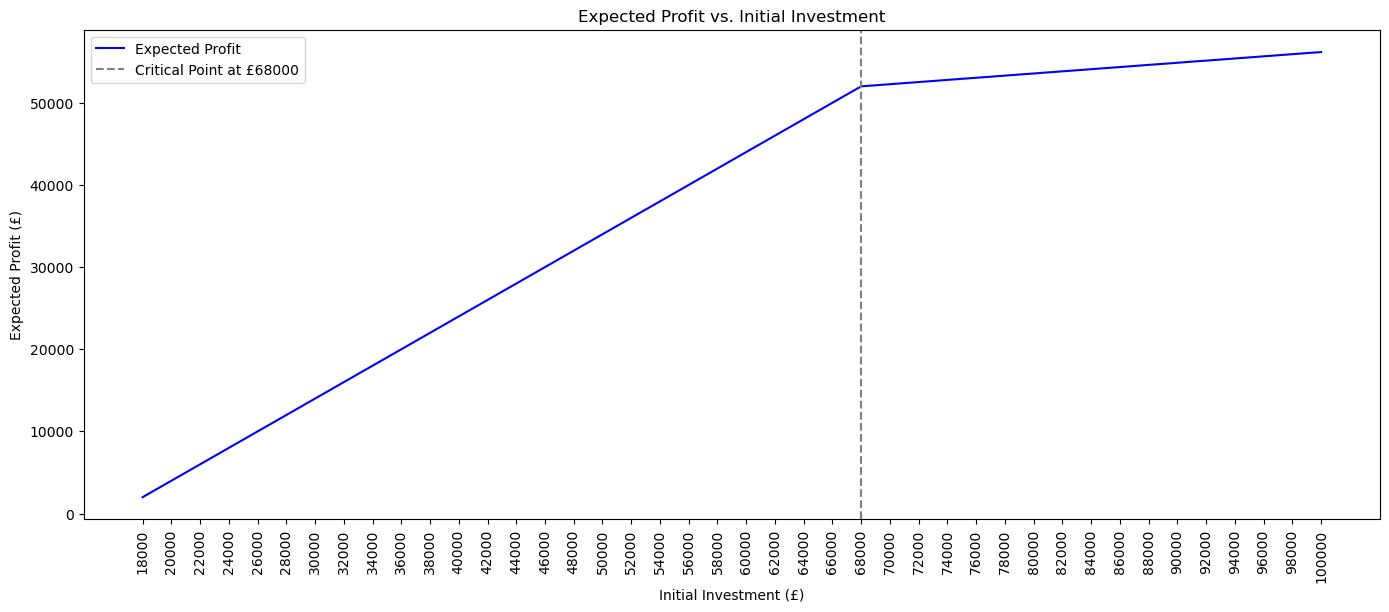

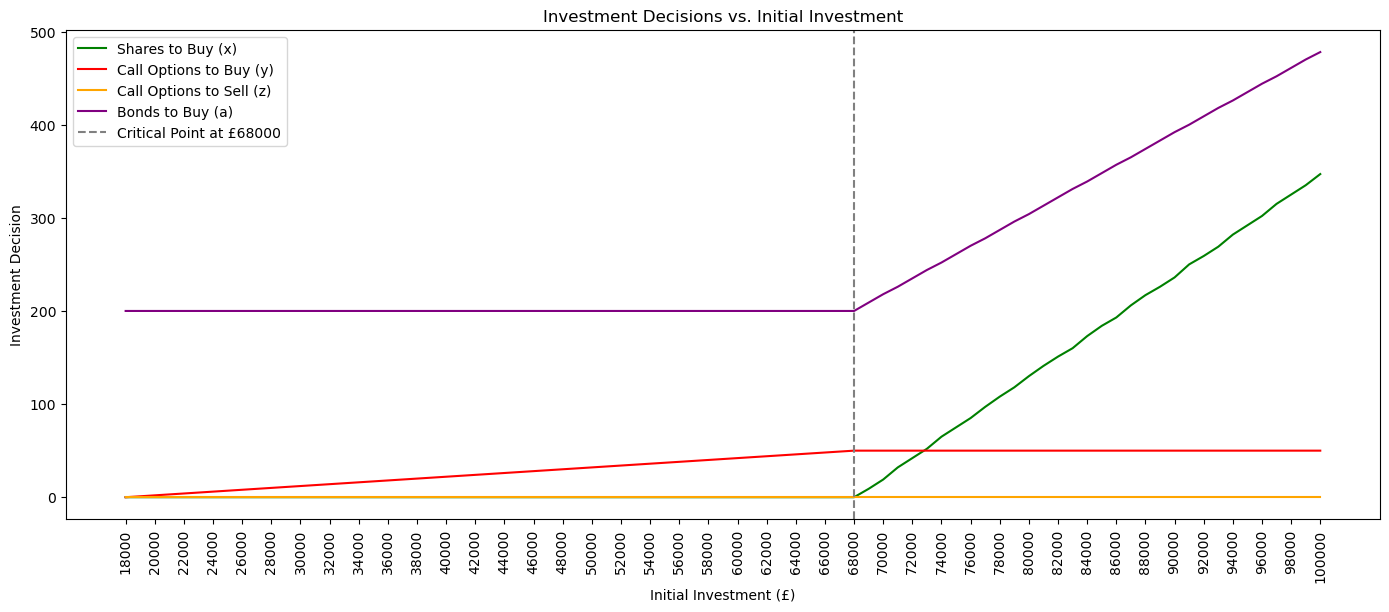

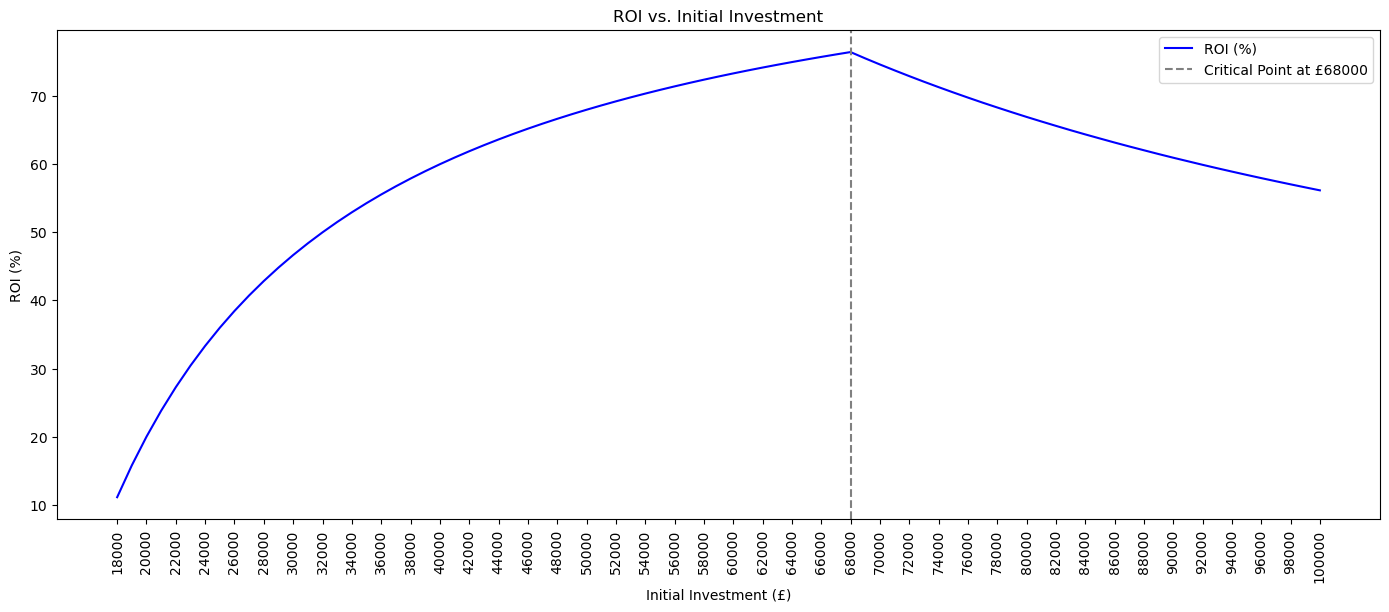

In [4]:
# Plot the expected profit vs. initial investment
plt.figure(figsize=(14, 7))
plt.plot(initial_investments, profits, label='Expected Profit', color='blue')
plt.xlabel('Initial Investment (£)')
plt.ylabel('Expected Profit (£)')
plt.title('Expected Profit vs. Initial Investment')
plt.xticks(range(18000, 101000, 2000), rotation=90)
plt.axvline(x=68000, color='gray', linestyle='--', label='Critical Point at £68000')
plt.legend()
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the title
plt.subplots_adjust(bottom=0.2)  # Make room for the x-axis labels
plt.savefig('expected_profit_vs_initial_investment.png')
plt.show()

# Plot the investment decisions vs. initial investment
plt.figure(figsize=(14, 7))
plt.plot(initial_investments, shares_to_buy, label='Shares to Buy (x)', color='green')
plt.plot(initial_investments, call_options_to_buy, label='Call Options to Buy (y)', color='red')
plt.plot(initial_investments, call_options_to_sell, label='Call Options to Sell (z)', color='orange')
plt.plot(initial_investments, bonds_to_buy, label='Bonds to Buy (a)', color='purple')
plt.xlabel('Initial Investment (£)')
plt.ylabel('Investment Decision')
plt.title('Investment Decisions vs. Initial Investment')
plt.xticks(range(18000, 101000, 2000), rotation=90)
plt.axvline(x=68000, color='gray', linestyle='--', label='Critical Point at £68000')
plt.legend()
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the title
plt.subplots_adjust(bottom=0.2)  # Make room for the x-axis labels
plt.savefig('investment_decisions_vs_initial_investment.png')
plt.show()

# Plot the ROI vs. initial investment
plt.figure(figsize=(14, 7))
plt.plot(initial_investments, rois, label='ROI (%)', color='blue')
plt.xlabel('Initial Investment (£)')
plt.ylabel('ROI (%)')
plt.title('ROI vs. Initial Investment')
plt.xticks(range(18000, 101000, 2000), rotation=90)
plt.axvline(x=68000, color='gray', linestyle='--', label='Critical Point at £68000')
plt.legend()
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the title
plt.subplots_adjust(bottom=0.2)  # Make room for the x-axis labels
plt.savefig('roi_vs_initial_investment.png')
plt.show()

### Analysis of the Results
Based on the provided charts, we can draw several insights regarding the expected profit and investment decisions as the initial investment varies from £18,000 to £100,000.

**Expected Profit vs. Initial Investment**

1. Linear Growth:

- The expected profit increases linearly with the initial investment up to a certain point, demonstrating that higher initial investments generally yield higher expected profits. This is expected, as more capital allows for more substantial investments in profitable assets.

2. Critical Point at £68,000:

- There is a noticeable change in the slope of the expected profit at the £68,000 mark. Up to £68,000, the expected profit increases rapidly. Beyond this point, the rate of increase in expected profit slows down.
- This suggests that the investment strategy reaches a point of diminishing returns at £68,000, indicating that the additional investment beyond this amount does not yield as high an incremental profit as the investments up to £68,000.

**Investment Decisions vs. Initial Investment**

1. Shares to Buy (x):

- The number of shares to buy increases gradually with the initial investment. This reflects a balanced strategy where a portion of the increased investment is allocated to purchasing more shares of stock ABC.

2. Call Options to Buy (y):

- The number of call options to buy remains constant at a lower level until the critical point (£68,000). This indicates a strategy where call options are utilized up to a certain extent and then capped.
- Beyond the critical point, there is no significant increase in call options to buy, suggesting that call options are not a preferred investment beyond a certain initial investment level.

3. Call Options to Sell (z):

- The number of call options to sell remains at a consistent level, indicating that selling call options is part of a steady strategy regardless of the initial investment size.

4. Bonds to Buy (a):

- The amount invested in zero-coupon bonds increases significantly and consistently with the initial investment. Bonds form a substantial part of the investment strategy, particularly as the initial investment increases.
- This heavy allocation towards bonds reflects a conservative approach to secure risk-free returns, especially as the investment amount grows.

**ROI% vs. Initial Investment**

1. Parabolic Growth and Decline:

- The ROI increases rapidly with the initial investment, peaking at around the £68,000 mark. This peak indicates the point at which the investment strategy is most efficient in generating returns relative to the amount invested.
- Beyond £68,000, the ROI begins to decline, suggesting that the efficiency of additional investments decreases, leading to diminishing returns.

2. Critical Point at £68,000:

- The critical point at £68,000 is evident in the ROI chart as well, where the ROI reaches its maximum. This reinforces the observation from the expected profit chart that £68,000 is a significant threshold for the investment strategy.

**Key Takeaways**

1. Optimal Allocation:

- The optimal investment strategy involves a mix of stocks, call options, and bonds, with a notable emphasis on bonds as the initial investment increases.
- Stocks and call options play a crucial role up to the critical investment point (£68,000), beyond which bonds dominate the investment strategy.

2. Diminishing Returns:

- The diminishing returns beyond the £68,000 investment highlight the importance of finding a balance between risk and return. Investors should consider this critical point when deciding on the amount to invest.

3. Balanced Strategy:

- The consistent allocation towards call options and the gradual increase in shares bought suggest a balanced and diversified investment approach, optimizing for both risk and return.

By understanding these trends, investors can tailor their strategies based on their available capital and desired outcomes, ensuring an optimized and informed investment decision-making process.